In [15]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math
from skimage import io
%matplotlib inline

## Intro


Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$, but retaining the color. However, the image is usually represented as an array of pixels, thus having dimensions (image height, image width, 3) if color is represented in RGB system. You can use *warpAffine()* function from cv2 or implement a function that manipulates pixel's position given an array of pixels and a transformation matrix yourself.

Load the first image, resize it to more convenient size and examine its representation. What is its shape? What do the values mean?

In [18]:
# Load image 01
img1_path = "/content/img1.jpg"

image = cv.imread(img1_path)

resized = cv.resize(image, (500, 500))

height, width = resized.shape[:2]
cX, cY = (width // 2, height // 2)

## Rotation matrix

Rotation is a linear transformation that preseves at least one point. An example of rotation by angle $\phi$ on xy-plane is depicted in the image below:   
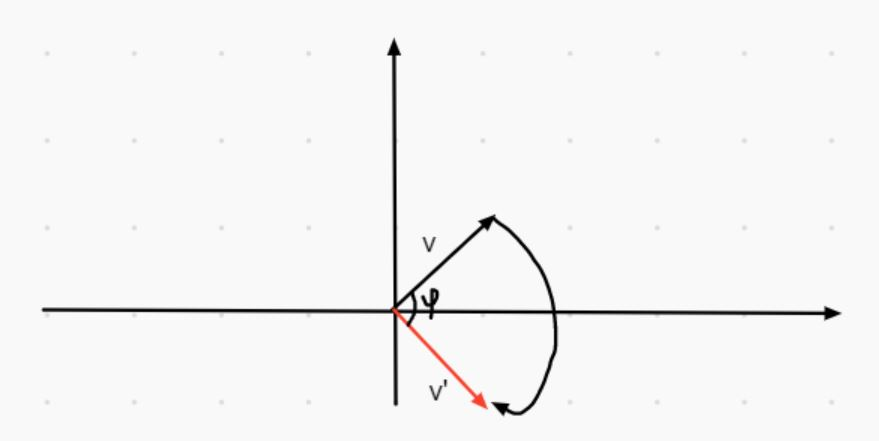


What is the rotation matrix by a generic angle $\phi$?
Implement a function that calculates rotation matrix and apply it to the image to rotate it by $45^\circ$

### Results:

Rotating the point on a plane is equivalent to rotating points in the plane using rotation matrices.

We have a starting point at coordinates (x0, y0) and the angle between the vector that connects origin and the point and the x coordinate is gamma.

Denote the vector length r.

*(1)*
    
    We can express x0 = r * cos(gamma)
    And y0  r * sin(gamma)

Now, if we look at the other (transformed) vector with coordinates (x1, y1) and length r
The new angle of the vector is *gamma + phi*

*(2)*

    Therefore, x1 = r * cos(gamma + phi)
    y1 = r * sin(gamma + phi)

Now we can rewrite: 
    
    x1 = r * cos(gamma + phi) = r * (cos(gamma)*cos(phi) - sin(gamma)*sin(phi)) =
    = r * cos(gamma)*cos(phi) - r * sin(gamma)*sin(phi) = [from (1)] = 
    = x0 * cos(phi) - y0 * sin(phi)

Same for 
    
    y1 = r * sin(gamma + phi) = r * (sin(gamma)*cos(phi) + cos(gamma)*sin(phi)) =
    = r * sin(gamma)*cos(phi) + r * cos(gamma)*sin(phi) = [from (1)] =
    = y0 * cos(phi) + x0 * sin(phi)

At the end we end up with two expressions:
    
    x1 = x0 * cos(phi) - y0 * sin(phi)
    y1 = y0 * cos(phi) + x0 * sin(phi)

Rewrite the following system in a matrix form:
    
    [[cos(phi)    -sin(phi)]
    [sin(phi)    cos(phi)]]

This is our rotation matrix.

In [19]:
def get_rotation_matrix(phi):
    phi = math.radians(phi)

    shift_x = 0
    shift_y = 0

    transformation_matrix = np.array([[math.cos(phi), -math.sin(phi), shift_x],
                                      [math.sin(phi), math.cos(phi), shift_y]])
    return transformation_matrix

M = get_rotation_matrix(45)

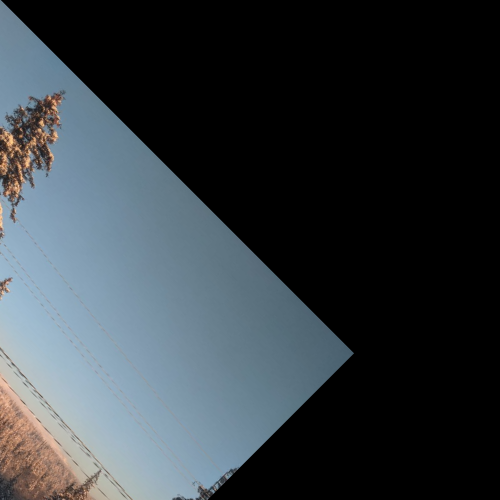

In [21]:
rotated = cv.warpAffine(resized, M, (500, 500), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
cv2_imshow(rotated)

## Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis and they don't have to be equal.On the picture v'' represents vector v scaled by a factor (0.5, 0.5) and v' - by (1, 0.5).
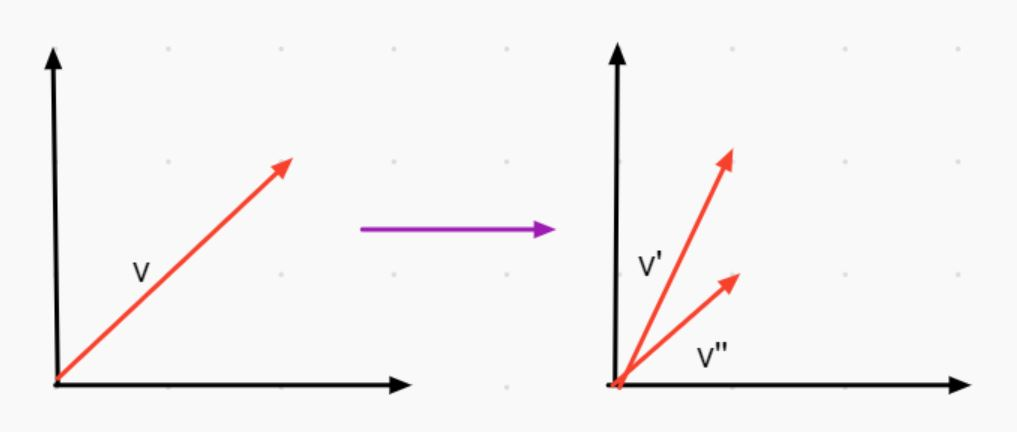


Derive a general form for a translation matrix and apply scaling by a factor of (1, 0.5) to the image.

### Results:

To derive the general form of the transformation matrix, we need to define the scaling of a vector means.

The scaling idea takes both coordinates of a given vector and scaling/multiplying them be some constants.
As a result, we end up with a stretched vector by some scaling x-factor and some y scaling factor.

Generally speaking, we want to have this system of two equations to work with vectors on a plane.
    
    x1 = sfx * x0 = [express as] = sfx * x0 + 0 * y0
    y1 = y0 * yfx = [express as] = 0 * x0 + y0 * yfx

We can now form a corresponding matrix to this system
    
    [x1] = [sfx   0] [x0]
    [y1] = [0   yfx] [y0]

Where
    
    [sfx   0]
    [0   yfx]
is a transforming matrix to be applied

In [22]:
def get_scaling_matrix(scale_factor_x, scale_factor_y):
    # shift_x = -(height * scale_factor_x - height)
    # shift_y = -(width * scale_factor_y - width)
    shift_x = 0
    shift_y = 0
    transformation_matrix = np.array([[float(scale_factor_x), 0, shift_x], 
                                      [0, float(scale_factor_y), shift_y]])
    return transformation_matrix


M2 = get_scaling_matrix(1, 0.5)

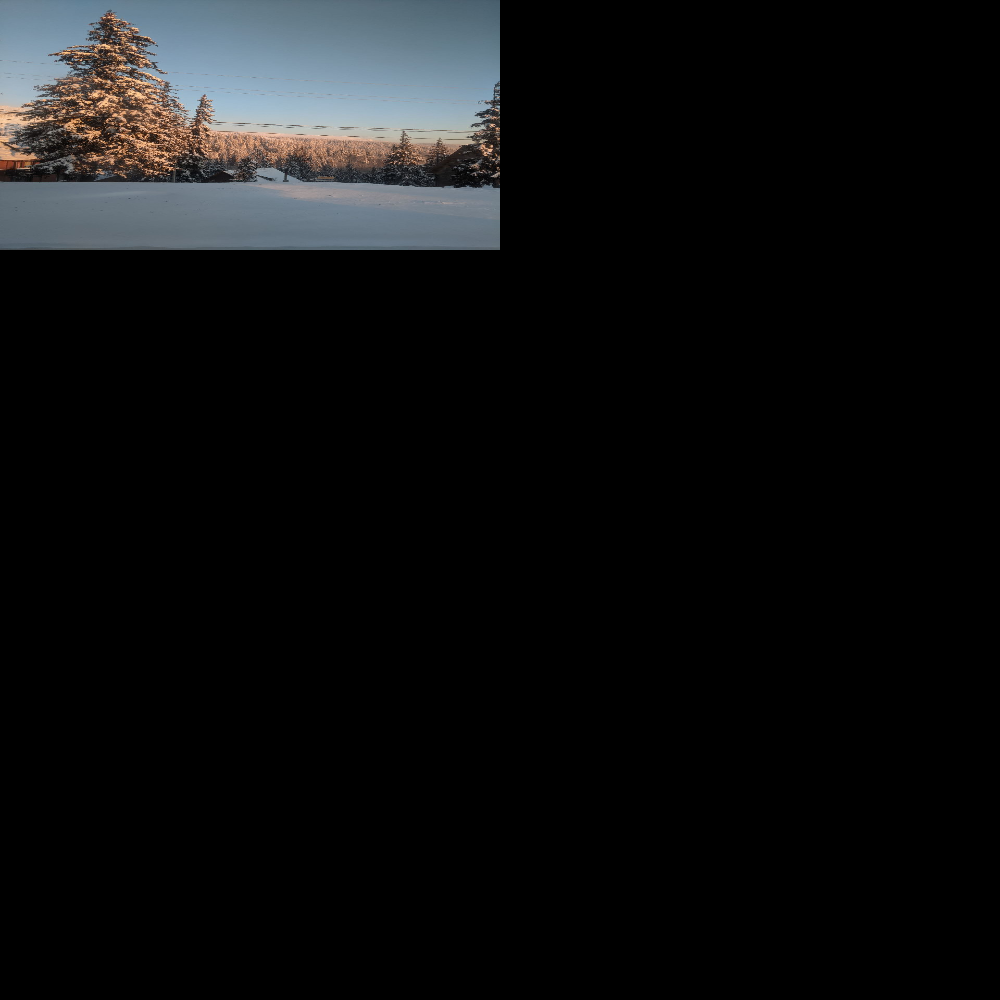

In [23]:
scaled = cv.warpAffine(resized, M2, (1000, 1000), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
cv2_imshow(scaled)

## Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengthes of line segments. You will ween to find a transformation matrix that moves point (x, y) to (x+1.5y, y) and apply it to the image. 

### Results:
Horizontal shearing moves each point in a fixed direction by a distance proportional to the point's y-coordinate.
Thus, we know that the x coordinate will change by a factor of some constant * corresponding y-coordinate.

To conclude:
    
    x1 = x0 + factor * y0
    y1 = y0 = 0 * x0 + 1 * y0

Now, we want to express the following system as a corresponding transformation matrix

Therefore,
    
    [1    factor]
    [0       1  ]
is the wanted transformation matrix to be applied

In [24]:
def get_horizontal_shear_matrix(factor):
    shift_x = 0
    shift_y = 0

    transformation_matrix = np.array([[1.0, float(factor), shift_x], 
                                      [0, 1.0, shift_y]])
    return transformation_matrix


M3 = get_horizontal_shear_matrix(1.5)

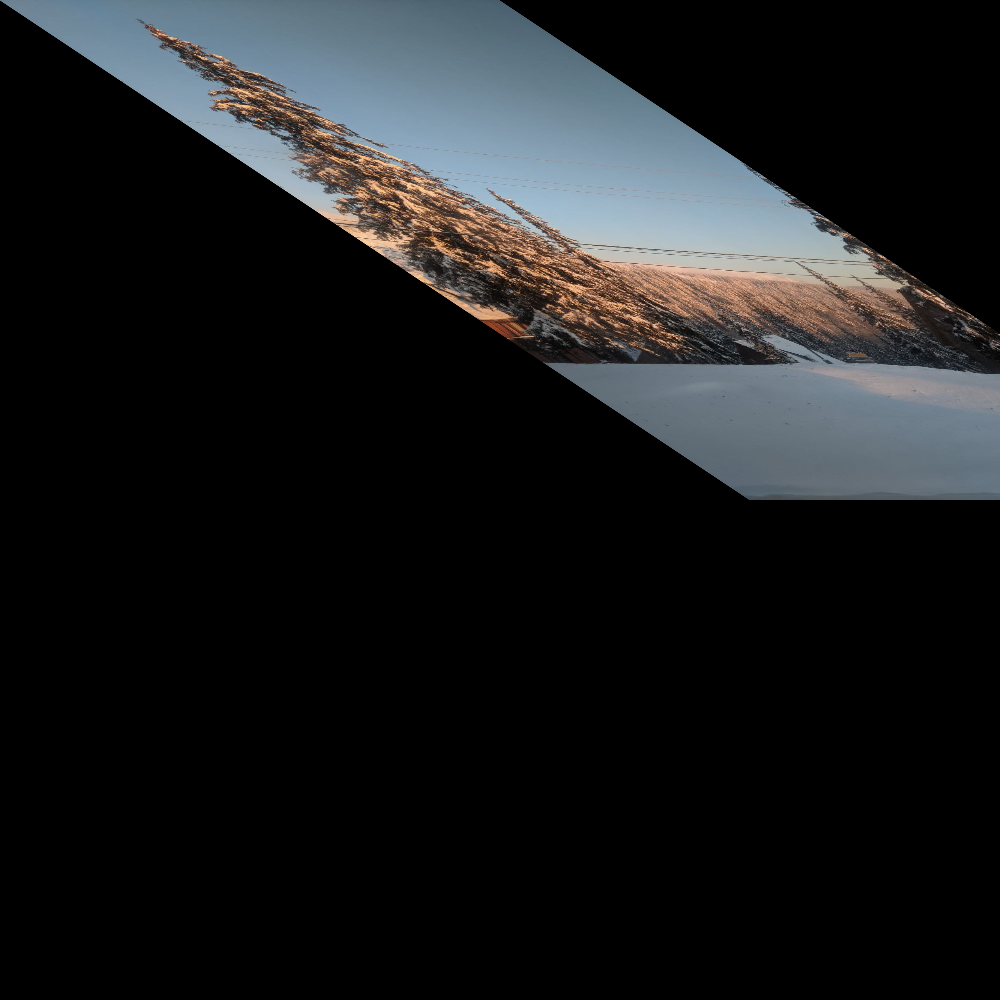

In [25]:
sheared = cv.warpAffine(resized, M3, (1000, 1000), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
cv2_imshow(sheared)

## Translation matrix

Translation is a transformation that moves every point of a figure by fixed distance. Implement a function that produces translation matrix and apply to the image translation by (20, 25).


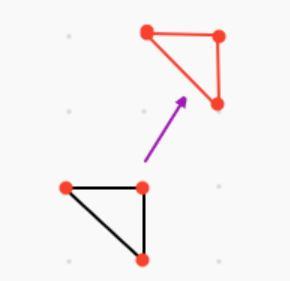


### Results:
The translation is a shift in coordinates applied to (x0, y0)

The translated vector will move from the starting position by the factor based on the translation factor of x and translation factor of y

Therefore, the translation matrix consists of the basis vectors for dimension 2, representing its columns in a matrix.
However, the numpy's **warpAffine()** is being fed the 2 by 3 M matrix. The last column defines the wanted shift of vectors.

To shift, we need to add to each coordinate some constant. This is what **warpAffine()** function does. It adds the column of the
M-transformation matrix to the initial coordinates. Thus shifts the coordinates of image pixels.



In [27]:
def get_translation_matrix(translation_factor_x, translation_factor_y):
    shift_x = translation_factor_x
    shift_y = translation_factor_y

    transformation_matrix = np.array([[1.0, 0, shift_x], 
                                      [0, 1.0, shift_y]])
    return transformation_matrix


M4 = get_translation_matrix(20, 25)

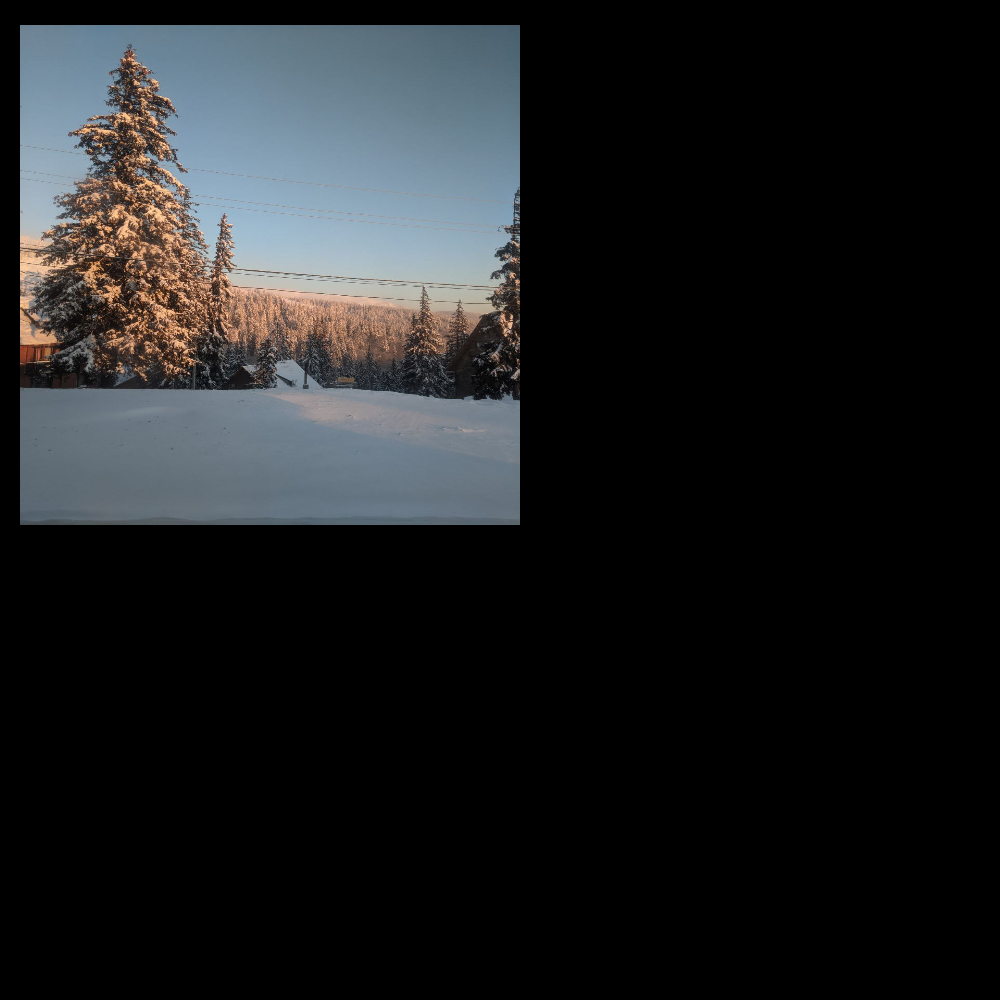

In [28]:
translated = cv.warpAffine(resized, M4, (1000, 1000), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
cv2_imshow(translated)

## Mirror symmetry 
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$. Implement a function that produces transformation matrix that represents vertical mirror symmetry.

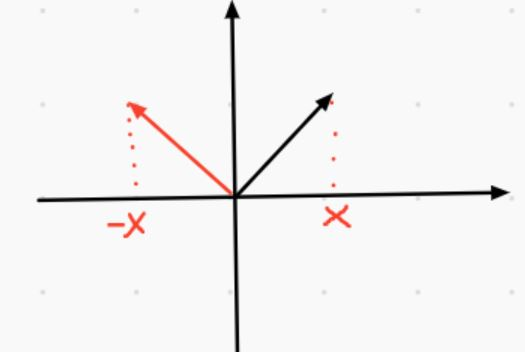


### Results:
Mirroring is the process of changing the initial coordinates of a vector to negative.
In this case, we need to implement the mirroring on the x-axis. Thus, change x0 to x1 = -x0

We end up with the system of two equations:
    
    x1 = -x0 = -1 * x0 + 0 * y0
    y1 = 0 * x0 + 1 * y0
        
The corresponding transformation matrix is:
    
    [-1   0]
    [0    1]

However, we also apply the shift to maintain the position of an image. It can be initialized parametrically

In [29]:
def get_horizontal_mirror_marix():
    shift_x = width
    shift_y = 0

    transformation_matrix = np.array([[-1.0, 0, shift_x], 
                                      [0, 1.0, shift_y]])
    return transformation_matrix


M5 = get_horizontal_mirror_marix()

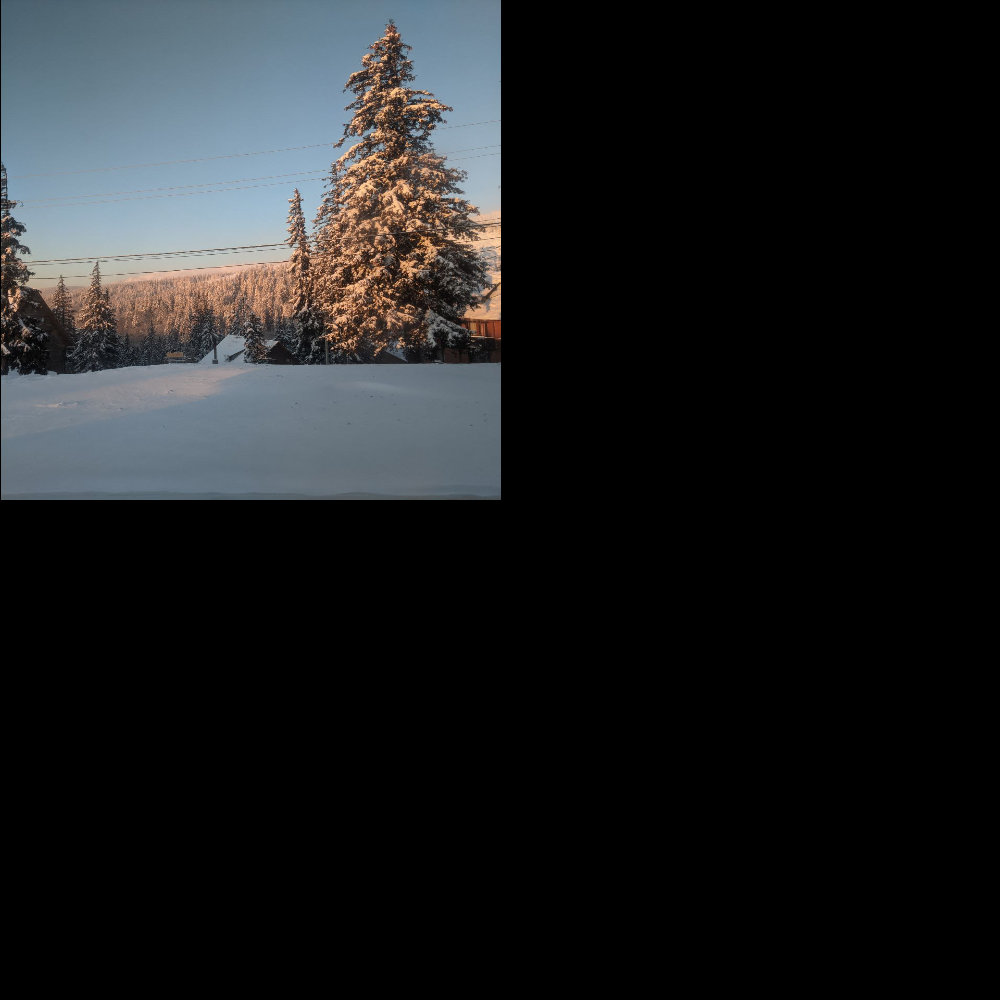

In [30]:
mirrored = cv.warpAffine(resized, M5, (1000, 1000), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
cv2_imshow(mirrored)

# Perspective shift matrix
You will need to use img2.jpg for this task. Load and resize it in the similar manner as with img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   
To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image (3 of these points should not be colinear). Transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector. 

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

Find coefficients $c_{ij}$ via solving linear system containing source and destination coordinates and 9 'c' coefficients with numpy methods and apply it to an image so that the sign is clearly visible. Explain how the system was constructed.

(Hint: $c_{22} = 1$)


### Results:
The perspective change is based on the change of coordinates from the initial state to the given. This is done by specifying the four coordinates on the starting matrix and the destination matrix.

However, the coefficients that express the new coordinates need to be calculated before substitution

We are given the formula for the new coordinates:

    ui = (c00 * xi + c01 * yi + c02) / (c20 * xi + c21 * yi + c22)
    vi = (c10 * xi + c11 * yi + c12) / (c20 * xi + c21 * yi + c22)

*1. Multiply both sides by the denominator:*

    ui * (c20 * xi + c21 * yi + c22) = c00 * xi + c01 * yi + c02
    vi * (c20 * xi + c21 * yi + c22) = c10 * xi + c11 * yi + c12

*2. Open the brackets and assume c22 = 1:*

    c20 * xi * ui + c21 * yi * ui + ui = c00 * xi + c01 * yi + c02
    c20 * xi * vi + c21 * yi * vi + vi = c10 * xi + c11 * yi + c12

*3. Express ui and vi:*

    ui = c00 * xi + c01 * yi + c02 - c20 * xi * ui - c21 * yi * ui
    vi = c10 * xi + c11 * yi + c12 - c20 * xi * vi - c21 * yi * vi

*4. Express the following system in a matrix form:*

    [ x0 y0 1 0 0 0 - x0 * u0 - y0 * u0 ][ c00 ]   [ u0 ]
    [ x1 y1 1 0 0 0 - x1 * u1 - y1 * u1 ][ c01 ]   [ u1 ]
    [ x2 y2 1 0 0 0 - x2 * u2 - y2 * u2 ][ c02 ]   [ u2 ]
    [ x3 y3 1 0 0 0 - x3 * u3 - y3 * u3 ][ c10 ] = [ u3 ]
    [ 0 0 0 x0 y0 1 - x0 * v0 - y0 * v0 ][ c11 ]   [ v0 ]
    [ 0 0 0 x1 y1 1 - x1 * v1 - y1 * v1 ][ c12 ]   [ v1 ]
    [ 0 0 0 x2 y2 1 - x2 * v2 - y2 * v2 ][ c20 ]   [ v2 ]
    [ 0 0 0 x3 y3 1 - x3 * v3 - y3 * v3 ][ c21 ]   [ v3 ]

Now we solve the linear system of 8 equations by finding the c-vector

**np.linalg.solve()** function computes the "exact" solution, x. In our form x = c


In [31]:
# Load image 02
img2_path = "/content/img2.jpg"
image = cv.imread(img2_path)
img2_resized = cv.resize(image, (500, 500))

In [32]:
def get_perspective_transform_matrix(source, destination):
    in_matrix = []
    for (x, y), (u, v) in zip(source, destination):
        in_matrix.extend([[x, y, 1, 0, 0, 0, -u * x, -u * y],
                          [0, 0, 0, x, y, 1, -v * x, -v * y]])

    A = np.matrix(in_matrix, dtype=np.float)
    B = np.array(destination).reshape(8)
    x = np.linalg.solve(A, B)
    transformation_matrix = np.append(np.array(x).reshape(8), 1).reshape((3, 3))
    return transformation_matrix


rows, cols, ch = img2_resized.shape

source_points = np.float32([(0, 0), (500, 0), (0, 500), (500, 500)])
destination_points = np.float32([(0, 0), (400, 100), (50, 600), (700, 700)])


perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)
transformed = cv.warpPerspective(img2_resized, perspective_shift_m, (1000, 1000), 
                                 flags=cv.INTER_LINEAR,
                                 borderMode=cv.BORDER_CONSTANT)



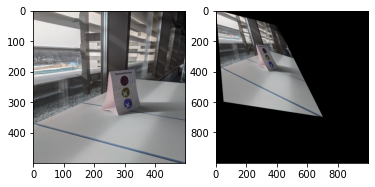

In [33]:
# Plot source and transformed images side by side
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img2_resized)
axarr[1].imshow(transformed)
plt.show()

## Composition of transformations

Apply following transformations in specified order to the original image  and show the results side-by-side   
1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.  
Is result the same? Is it possible to obtain same/different result changing the order of transformations.



### Results:
The result is not the same. Because after the transformation is applied, the obtained matrix is not normalized

The origin point (point (0, 0) before which the transformations are applied) is the same for the starting matrix.
Basically, here we only "shift the colors." Due to this, the rotated matrix, for example, will end up rotating every pixel around the origin (0, 0) point.

Thus if we decide to rotate and then shift or in any other way transform the matrix, the ending result won't coincide with the result of an obtained matrix, whose transformations were applied in a different order.

**Note: some transformations and their results do not depend on the order of their appliance.**

In [34]:
def composition_of_transformations():
    # 1
    M_scaled = get_scaling_matrix(1.5, 2)
    M_rotated = get_rotation_matrix(45)
    M_translated = get_translation_matrix(250, 250)

    scaled_1 = cv.warpAffine(resized, M_scaled, (1000, 1000), 
                             flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
    rotated_1 = cv.warpAffine(scaled_1, M_rotated, (1000, 1000), 
                              flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
    translated_1 = cv.warpAffine(rotated_1, M_translated, (1000, 1000), flags=cv.INTER_LINEAR,
                                 borderMode=cv.BORDER_CONSTANT)

    # 2
    translated_2 = cv.warpAffine(resized, M_translated, (1000, 1000), flags=cv.INTER_LINEAR,
                                 borderMode=cv.BORDER_CONSTANT)
    rotated_2 = cv.warpAffine(translated_2, M_rotated, (1000, 1000), flags=cv.INTER_LINEAR,
                              borderMode=cv.BORDER_CONSTANT)  # here we have a different picture.
    # Rotation point is still on (0, 0)
    scaled_2 = cv.warpAffine(rotated_2, M_scaled, (1000, 1000), 
                             flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)

    return translated_1, scaled_2

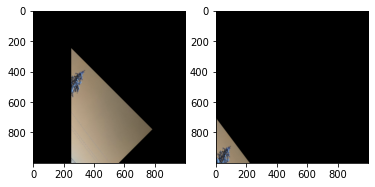

In [35]:
img_1, img_2 = composition_of_transformations()
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(img_1)
axarr[1].imshow(img_2)
plt.show()

## Summary 
Think of the answers to the following questions:  

What is a transformation matrix?  
- Transformation matrix is a matrix that allows values of the corresponding row and column positions to change based on the values applied.

How its shape and values affect the resulting image? 
- The resulting image has its coordinates changed based on the transformation matrix M

What is a shape of a typical transformation matrix that is applied to images?  
- The typical transformation matrix size of the dimension of 2 is 2 by 2 matrix. Due to having two rows and two columns in it, we can apply it to each coordinate of an image (expressed as an image), which is defined by exactly two values (x0, y0)
- The third row usually implies the shift of a given image (shift of every coordinate in the initial image)

What can be a result of the composition of transformations?  
- Results are different if the order in which the transformations are applied is different. However, if the origin of the image changes based on the transformation, then the compositions should be the same
- A result of a composition is usually the transformed matrix.

- One thing to mention, with perspective shift transformation, we can achieve the same results in transforming a given matrix. Indeed for the rotation to be done, we would need to find the rotation coefficients first.

What is a perspective shift transformation in terms of geometry?
- It can be interpreted as the geometric transformations in space. However, with the help of only two dimensions.
- It is vividly used in 3D computing and visualizing
